In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
#Loading Dataset:
!pip install -q kaggle


In [4]:
#move the zip file to my google drive
#first mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip /content/drive/MyDrive/temp/V2.zip -d dataset/

Archive:  /content/drive/MyDrive/temp/V2.zip
   creating: dataset/V2/Annotations/
  inflating: dataset/V2/Annotations/scene00022.png  
  inflating: dataset/V2/Annotations/scene00023.png  
  inflating: dataset/V2/Annotations/scene00024.png  
  inflating: dataset/V2/Annotations/scene00025.png  
  inflating: dataset/V2/Annotations/scene00026.png  
  inflating: dataset/V2/Annotations/scene00027.png  
  inflating: dataset/V2/Annotations/scene00028.png  
  inflating: dataset/V2/Annotations/scene00029.png  
  inflating: dataset/V2/Annotations/scene00030.png  
  inflating: dataset/V2/Annotations/scene00031.png  
  inflating: dataset/V2/Annotations/scene00032.png  
  inflating: dataset/V2/Annotations/scene00033.png  
  inflating: dataset/V2/Annotations/scene00034.png  
  inflating: dataset/V2/Annotations/scene00035.png  
  inflating: dataset/V2/Annotations/scene00036.png  
  inflating: dataset/V2/Annotations/scene00037.png  
  inflating: dataset/V2/Annotations/scene00038.png  
  inflating: data

Make proper accurate splits of data

In [8]:
#convert all the segmented images into black and white
import cv2
import os
import numpy as np

def convert_annotations(input_folder, output_folder):
    """
    Convert pink annotations to binary (black and white) masks
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read image
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)

            # Convert to binary mask
            # Convert to grayscale first
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Threshold to create binary image
            # Assuming pink regions are significantly different from black background
            _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

            # Save the binary mask
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, binary)

# Usage
input_folder = "/content/dataset/V2/Annotations"
output_folder = "/content/dataset/V2/AnnotationsWB"
convert_annotations(input_folder, output_folder)

In [9]:
mkdir '/content/dataset/test/masks'

mkdir: cannot create directory ‘/content/dataset/test/masks’: No such file or directory


In [10]:
mkdir '/content/dataset/test/Images'

mkdir: cannot create directory ‘/content/dataset/test/Images’: No such file or directory


In [11]:
import os
import shutil
import random

# Assuming the previous code has already been executed, and the following directories are set up:
IMAGE_PATH = '/content/dataset/V2/Images/'
MASK_PATH = '/content/dataset/V2/AnnotationsWB'
TEST_PATH = '/content/dataset/test/Images'

# Create the test directory if it doesn't exist
os.makedirs(TEST_PATH, exist_ok=True)

# Get all image filenames
all_images = sorted([f for f in os.listdir(IMAGE_PATH) if f.endswith('.jpeg')])

# Calculate 10% for the test split
num_test = int(len(all_images) * 0.1)

# Randomly select 10% of the dataset for testing
test_indices = random.sample(range(len(all_images)), num_test)

# Move selected images to the test directory
for idx in test_indices:
    src = os.path.join(IMAGE_PATH, all_images[idx])
    dst = os.path.join(TEST_PATH, all_images[idx])
    shutil.move(src, dst)

print(f"Moved {num_test} images to the test directory: {TEST_PATH}")

# Check the number of files in the test directory
print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

Moved 12 images to the test directory: /content/dataset/test/Images
Number of files in the test directory: 12


In [12]:
# Create the test_masks directory if it doesn't exist
TEST_MASKS_PATH = '/content/dataset/test/masks/'
os.makedirs(TEST_MASKS_PATH, exist_ok=True)

# Move corresponding masks to the test_masks directory
for idx in test_indices:
    # Get the filename of the image that was moved
    image_filename = all_images[idx]

    # The mask filename is the same as the image filename
    mask_filename = image_filename  # No changes needed to the filename
    mask_filename = os.path.splitext(image_filename)[0] + ".png"
    src_mask = os.path.join(MASK_PATH, mask_filename)

    # Print debug information
    print(f"Checking for mask: {mask_filename}")
    print(f"Source mask path: {src_mask}")

    # Check if the corresponding mask exists before moving
    if os.path.exists(src_mask):
        dst_mask = os.path.join(TEST_MASKS_PATH, mask_filename)
        shutil.move(src_mask, dst_mask)
    else:
        print(f"Mask not found for image: {image_filename}")

# Check the number of files in the test_masks directory
print("Number of masks in the test_masks directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Checking for mask: scene00022.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00022.png
Checking for mask: scene00124.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00124.png
Checking for mask: scene00028.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00028.png
Checking for mask: scene00071.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00071.png
Checking for mask: scene00094.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00094.png
Checking for mask: scene00073.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00073.png
Checking for mask: scene00130.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00130.png
Checking for mask: scene00047.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00047.png
Checking for mask: scene00102.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene00102.png
Checking for mask: scene00061.png
Source mask path: /content/dataset/V2/AnnotationsWB/scene

In [13]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))

Number of files in the mask directory: 116
Number of files in the train_image directory: 116


In [14]:
print("Number of files in the mask directory: " + str(len(os.listdir(TEST_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Number of files in the mask directory: 12
Number of files in the train_image directory: 12


In [15]:
import os
from PIL import Image

def convert_png_to_jpeg(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            try:
                img = Image.open(os.path.join(directory, filename))
                # Convert image to RGB mode if it's not already
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                new_filename = os.path.splitext(filename)[0] + ".jpeg"
                img.save(os.path.join(directory, new_filename), "JPEG")
                os.remove(os.path.join(directory, filename))  # Remove the original PNG file
                print(f"Converted {filename} to {new_filename}")
            except Exception as e:
                print(f"Error converting {filename}: {e}")


convert_png_to_jpeg("/content/dataset/test/masks")

Converted scene00134.png to scene00134.jpeg
Converted scene00130.png to scene00130.jpeg
Converted scene00022.png to scene00022.jpeg
Converted scene00102.png to scene00102.jpeg
Converted scene00049.png to scene00049.jpeg
Converted scene00094.png to scene00094.jpeg
Converted scene00028.png to scene00028.jpeg
Converted scene00071.png to scene00071.jpeg
Converted scene00047.png to scene00047.jpeg
Converted scene00073.png to scene00073.jpeg
Converted scene00061.png to scene00061.jpeg
Converted scene00124.png to scene00124.jpeg


In [16]:
import os
from PIL import Image

# Define paths
jpeg_folder = "/content/dataset/V2/Images/"  # Replace with your folder containing .jpeg files
png_folder = "/content/dataset/V2/Imagespng"   # Replace with your desired output folder for .png files

# Create output folder if it doesn't exist
os.makedirs(png_folder, exist_ok=True)

# Loop through all files in the .jpeg folder
for file_name in os.listdir(jpeg_folder):
    if file_name.endswith(".jpeg") or file_name.endswith(".jpg"):
        # Open the .jpeg file
        jpeg_path = os.path.join(jpeg_folder, file_name)
        image = Image.open(jpeg_path)

        # Save as .png
        png_path = os.path.join(png_folder, file_name.rsplit(".", 1)[0] + ".png")
        image.save(png_path, format="PNG", optimize=True)  # Save without losing data
        print(f"Converted: {jpeg_path} -> {png_path}")

print("All files converted successfully.")

Converted: /content/dataset/V2/Images/scene00097.jpeg -> /content/dataset/V2/Imagespng/scene00097.png
Converted: /content/dataset/V2/Images/scene00058.jpeg -> /content/dataset/V2/Imagespng/scene00058.png
Converted: /content/dataset/V2/Images/scene00043.jpeg -> /content/dataset/V2/Imagespng/scene00043.png
Converted: /content/dataset/V2/Images/scene00067.jpeg -> /content/dataset/V2/Imagespng/scene00067.png
Converted: /content/dataset/V2/Images/scene00072.jpeg -> /content/dataset/V2/Imagespng/scene00072.png
Converted: /content/dataset/V2/Images/scene00096.jpeg -> /content/dataset/V2/Imagespng/scene00096.png
Converted: /content/dataset/V2/Images/scene00052.jpeg -> /content/dataset/V2/Imagespng/scene00052.png
Converted: /content/dataset/V2/Images/scene00135.jpeg -> /content/dataset/V2/Imagespng/scene00135.png
Converted: /content/dataset/V2/Images/scene00056.jpeg -> /content/dataset/V2/Imagespng/scene00056.png
Converted: /content/dataset/V2/Images/scene00116.jpeg -> /content/dataset/V2/Image

Testing Wavelet Transformations

In [17]:
import numpy as np
from matplotlib import pyplot as plt

from keras import backend as K
from keras.models import Model

from keras.layers import add, concatenate
from keras.layers import Input, Dense, Conv2D, Lambda
from keras.layers import Flatten, Reshape, Dropout, Activation
from keras.layers import AveragePooling2D, BatchNormalization

from keras.utils import plot_model

In [18]:
# batch operation usng tensor slice
def WaveletTransformAxisY(batch_img):
    odd_img  = batch_img[:,0::2]
    even_img = batch_img[:,1::2]
    L = (odd_img + even_img) / 2.0
    H = K.abs(odd_img - even_img)
    return L, H

def WaveletTransformAxisX(batch_img):
    # transpose + fliplr
    tmp_batch = K.permute_dimensions(batch_img, [0, 2, 1])[:,:,::-1]
    _dst_L, _dst_H = WaveletTransformAxisY(tmp_batch)
    # transpose + flipud
    dst_L = K.permute_dimensions(_dst_L, [0, 2, 1])[:,::-1,...]
    dst_H = K.permute_dimensions(_dst_H, [0, 2, 1])[:,::-1,...]
    return dst_L, dst_H

In [19]:
def Wavelet(batch_image):
    # make channel first image
    batch_image = K.permute_dimensions(batch_image, [0, 3, 1, 2])
    r = batch_image[:,0]  # take first channel for grayscale

    # level 1 decomposition
    wavelet_L, wavelet_H = WaveletTransformAxisY(r)
    r_wavelet_LL, r_wavelet_LH = WaveletTransformAxisX(wavelet_L)
    r_wavelet_HL, r_wavelet_HH = WaveletTransformAxisX(wavelet_H)

    wavelet_data = [r_wavelet_LL, r_wavelet_LH, r_wavelet_HL, r_wavelet_HH]
    transform_batch = K.stack(wavelet_data, axis=1)

    # level 2 decomposition (on LL component only)
    wavelet_L2, wavelet_H2 = WaveletTransformAxisY(r_wavelet_LL)
    r_wavelet_LL2, r_wavelet_LH2 = WaveletTransformAxisX(wavelet_L2)
    r_wavelet_HL2, r_wavelet_HH2 = WaveletTransformAxisX(wavelet_H2)

    wavelet_data_l2 = [r_wavelet_LL2, r_wavelet_LH2, r_wavelet_HL2, r_wavelet_HH2]
    transform_batch_l2 = K.stack(wavelet_data_l2, axis=1)

    # return both decomposition levels
    decom_level_1 = K.permute_dimensions(transform_batch, [0, 2, 3, 1])
    decom_level_2 = K.permute_dimensions(transform_batch_l2, [0, 2, 3, 1])

    return [decom_level_1, decom_level_2]

def Wavelet_out_shape(input_shapes):
    return [
        tuple([None, input_shapes[1]//2, input_shapes[2]//2, 4]),
        tuple([None, input_shapes[1]//4, input_shapes[2]//4, 4])
    ]

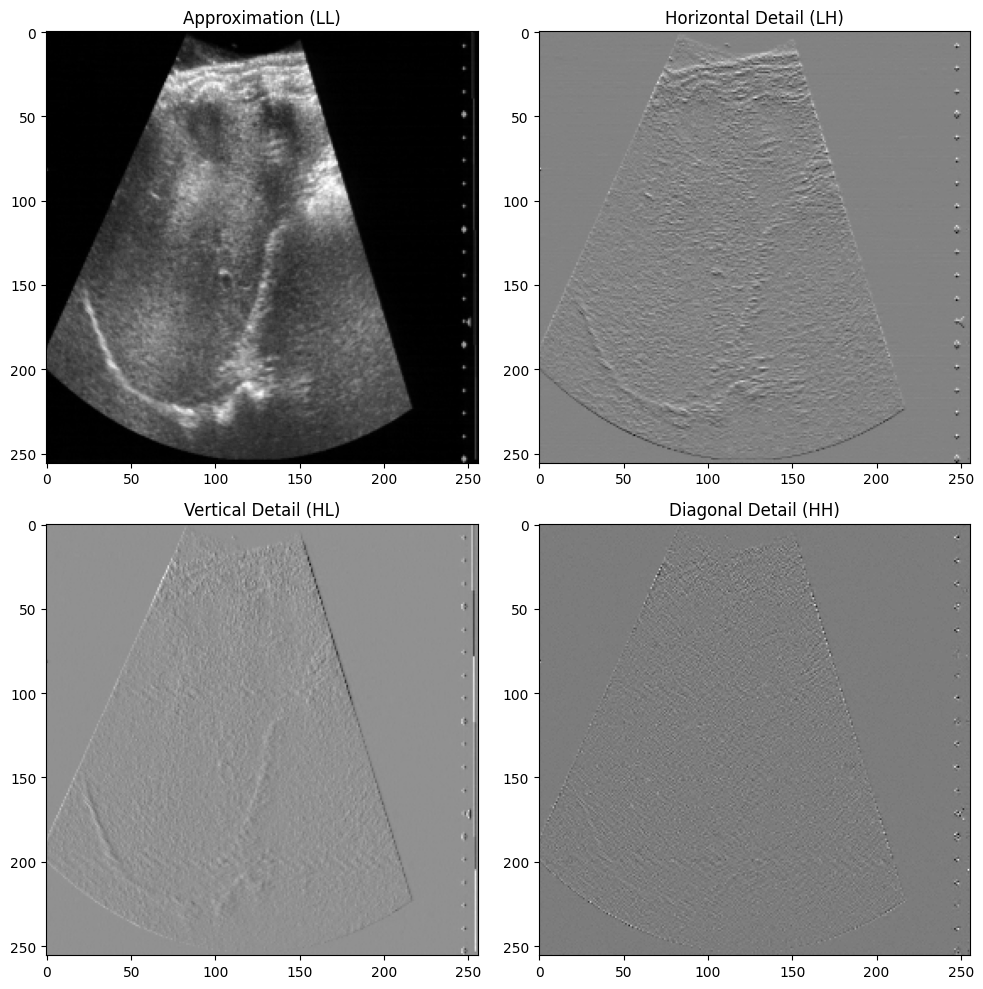

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (512,512))

    img = img / 255.0

    return img


def apply_filters(data):
    """Apply low-pass and high-pass filters"""
    # Define filter coefficients (Haar wavelet)
    low_pass = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
    high_pass = np.array([1/np.sqrt(2), -1/np.sqrt(2)])

    # Apply filters
    low = np.convolve(data, low_pass, mode='valid')[::2]
    high = np.convolve(data, high_pass, mode='valid')[::2]

    return low, high

def single_level_2d_wavelet_transform(image):
    """Perform single-level 2D wavelet transform using separable filters"""
    # Process rows
    L = np.zeros((image.shape[0], image.shape[1]//2))
    H = np.zeros((image.shape[0], image.shape[1]//2))

    for i in range(image.shape[0]):
        L[i], H[i] = apply_filters(image[i])

    # Process columns of L and H
    LL = np.zeros((image.shape[0]//2, image.shape[1]//2))
    LH = np.zeros((image.shape[0]//2, image.shape[1]//2))
    HL = np.zeros((image.shape[0]//2, image.shape[1]//2))
    HH = np.zeros((image.shape[0]//2, image.shape[1]//2))

    for j in range(L.shape[1]):
        LL[:,j], LH[:,j] = apply_filters(L[:,j])
        HL[:,j], HH[:,j] = apply_filters(H[:,j])

    return LL, (LH, HL, HH)

def perform_wavelet_transform(image):
    # Perform custom 2D wavelet transform
    LL, (LH, HL, HH) = single_level_2d_wavelet_transform(image)

    # Plot the original and transformed coefficients
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(LL, cmap='gray')
    plt.title('Approximation (LL)')

    plt.subplot(2, 2, 2)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail (LH)')

    plt.subplot(2, 2, 3)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail (HL)')

    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail (HH)')

    plt.tight_layout()
    plt.show()

# Example usage
image_path = '/content/dataset/V2/Imagespng/scene00023.png'
image = load_image(image_path)
perform_wavelet_transform(image)

Two Level Decompostion

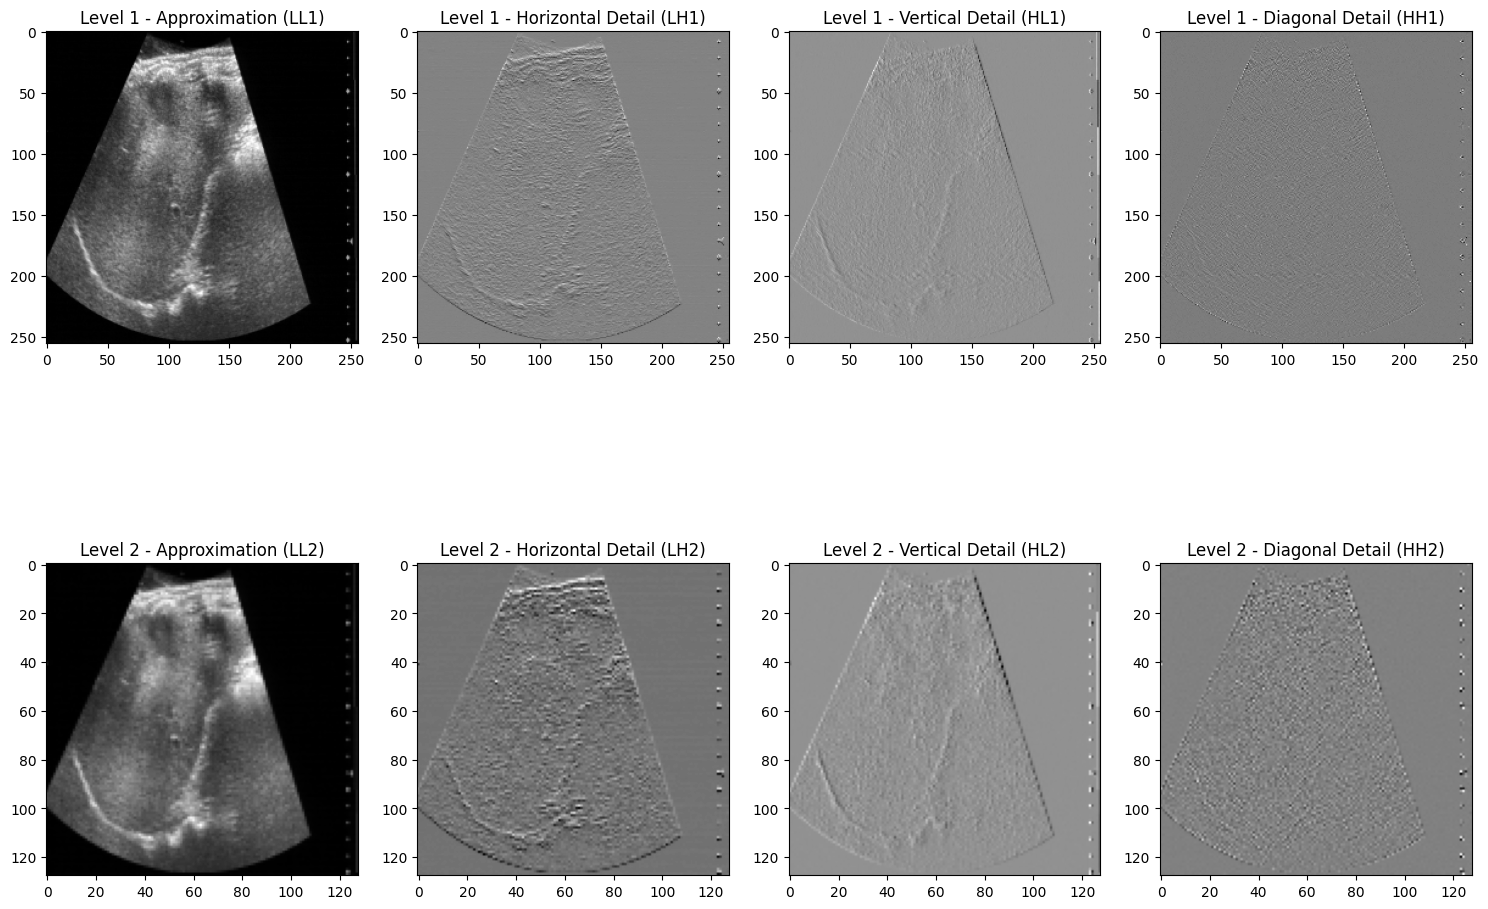

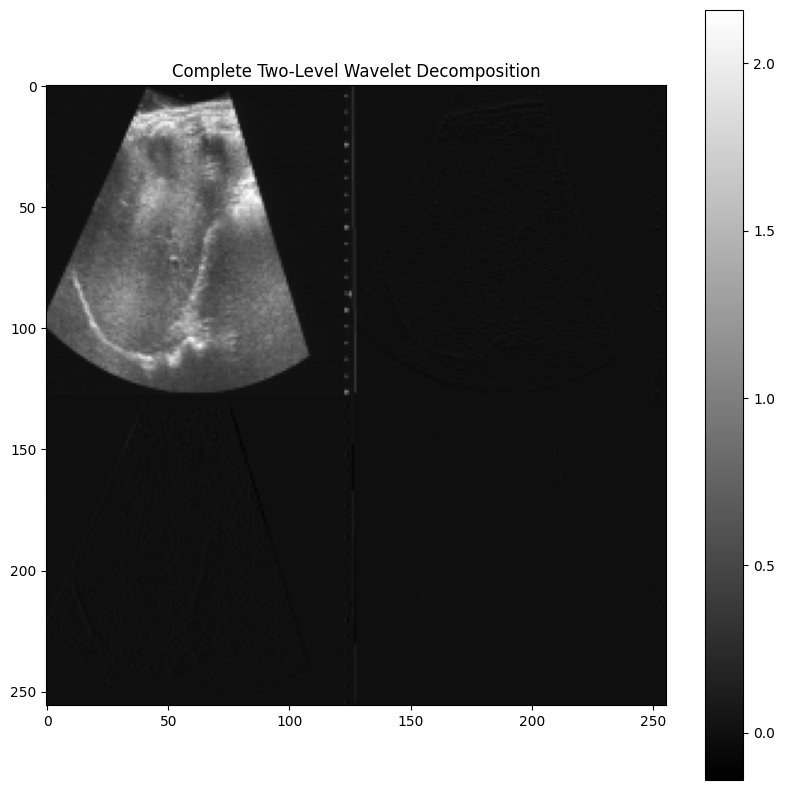

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img = img / 255.0
    return img

def apply_filters(data):
    low_pass = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
    high_pass = np.array([1/np.sqrt(2), -1/np.sqrt(2)])

    low = np.convolve(data, low_pass, mode='valid')[::2]
    high = np.convolve(data, high_pass, mode='valid')[::2]

    return low, high

def single_level_2d_wavelet_transform(image):
    # Process rows
    L = np.zeros((image.shape[0], image.shape[1]//2))
    H = np.zeros((image.shape[0], image.shape[1]//2))

    for i in range(image.shape[0]):
        L[i], H[i] = apply_filters(image[i])

    # Process columns of L and H
    LL = np.zeros((image.shape[0]//2, image.shape[1]//2))
    LH = np.zeros((image.shape[0]//2, image.shape[1]//2))
    HL = np.zeros((image.shape[0]//2, image.shape[1]//2))
    HH = np.zeros((image.shape[0]//2, image.shape[1]//2))

    for j in range(L.shape[1]):
        LL[:,j], LH[:,j] = apply_filters(L[:,j])
        HL[:,j], HH[:,j] = apply_filters(H[:,j])

    return LL, LH, HL, HH
def two_level_2d_wavelet_transform(image):
    # First level decomposition
    LL1, LH1, HL1, HH1 = single_level_2d_wavelet_transform(image)

    # Second level decomposition (only on LL1)
    LL2, LH2, HL2, HH2 = single_level_2d_wavelet_transform(LL1)

    return (LL1, LH1, HL1, HH1), (LL2, LH2, HL2, HH2)

def display_two_level_wavelet_transform(image):
    # Perform two-level wavelet transform
    (LL1, LH1, HL1, HH1), (LL2, LH2, HL2, HH2) = two_level_2d_wavelet_transform(image)

    # Create a figure to show both decomposition levels
    plt.figure(figsize=(15, 12))

    # First Level Decomposition (larger quadrants)
    plt.subplot(2, 4, 1)
    plt.imshow(LL1, cmap='gray')
    plt.title('Level 1 - Approximation (LL1)')

    plt.subplot(2, 4, 2)
    plt.imshow(LH1, cmap='gray')
    plt.title('Level 1 - Horizontal Detail (LH1)')

    plt.subplot(2, 4, 3)
    plt.imshow(HL1, cmap='gray')
    plt.title('Level 1 - Vertical Detail (HL1)')

    plt.subplot(2, 4, 4)
    plt.imshow(HH1, cmap='gray')
    plt.title('Level 1 - Diagonal Detail (HH1)')

    # Second Level Decomposition (of LL1)
    plt.subplot(2, 4, 5)
    plt.imshow(LL2, cmap='gray')
    plt.title('Level 2 - Approximation (LL2)')

    plt.subplot(2, 4, 6)
    plt.imshow(LH2, cmap='gray')
    plt.title('Level 2 - Horizontal Detail (LH2)')

    plt.subplot(2, 4, 7)
    plt.imshow(HL2, cmap='gray')
    plt.title('Level 2 - Vertical Detail (HL2)')

    plt.subplot(2, 4, 8)
    plt.imshow(HH2, cmap='gray')
    plt.title('Level 2 - Diagonal Detail (HH2)')

    plt.tight_layout()
    plt.show()

    # Show the complete two-level decomposition structure
    plt.figure(figsize=(10, 10))

    # Create full decomposition visualization
    h1, w1 = LL1.shape
    h2, w2 = LL2.shape

    full_decomp = np.zeros((h1, w1))

    # Place second level decomposition in top-left quarter
    full_decomp[:h2, :w2] = LL2
    full_decomp[:h2, w2:2*w2] = LH2
    full_decomp[h2:2*h2, :w2] = HL2
    full_decomp[h2:2*h2, w2:2*w2] = HH2

    # Place first level details (resized)
    full_decomp[:h1//2, w1//2:w1] = cv2.resize(LH1, (w1//2, h1//2))
    full_decomp[h1//2:h1, :w1//2] = cv2.resize(HL1, (w1//2, h1//2))
    full_decomp[h1//2:h1, w1//2:w1] = cv2.resize(HH1, (w1//2, h1//2))

    plt.imshow(full_decomp, cmap='gray')
    plt.title('Complete Two-Level Wavelet Decomposition')
    plt.colorbar()
    plt.show()


# Example usage
image_path = '/content/dataset/V2/Imagespng/scene00023.png'
image = load_image(image_path)
display_two_level_wavelet_transform(image)

INterRouted Method:

In [65]:
import tensorflow as tf

class WaveletDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_folder, mask_folder, file_list, batch_size, image_size=(128,128)):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.file_list = file_list
        self.batch_size = batch_size
        self.image_size = image_size

    def __len__(self):
        return int(np.ceil(len(self.file_list) / self.batch_size))

    def apply_filters(self, data):
        # Add padding to avoid border effects
        pad_size = len(data) % 2
        if pad_size > 0:
            data = np.pad(data, (0, pad_size), mode='reflect')
        # Define filter coefficients (Haar wavelet)
        low_pass = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
        high_pass = np.array([1/np.sqrt(2), -1/np.sqrt(2)])

        # Apply filters
        low = np.convolve(data, low_pass, mode='valid')[::2]
        high = np.convolve(data, high_pass, mode='valid')[::2]

        return low, high

    def second_level_2d_wavelet_transform(self, image):
        # First level - to get LL1
        L = np.zeros((image.shape[0], image.shape[1]//2))
        H = np.zeros((image.shape[0], image.shape[1]//2))

        for i in range(image.shape[0]):
            L[i], H[i] = self.apply_filters(image[i])

        LL1 = np.zeros((image.shape[0]//2, image.shape[1]//2))
        LH1 = np.zeros((image.shape[0]//2, image.shape[1]//2))

        for j in range(L.shape[1]):
            LL1[:,j], LH1[:,j] = self.apply_filters(L[:,j])

        # Second level - decompose LL1
        L2 = np.zeros((LL1.shape[0], LL1.shape[1]//2))
        H2 = np.zeros((LL1.shape[0], LL1.shape[1]//2))

        for i in range(LL1.shape[0]):
            L2[i], H2[i] = self.apply_filters(LL1[i])

        LL2 = np.zeros((LL1.shape[0]//2, LL1.shape[1]//2))
        LH2 = np.zeros((LL1.shape[0]//2, LL1.shape[1]//2))
        HL2 = np.zeros((LL1.shape[0]//2, LL1.shape[1]//2))
        HH2 = np.zeros((LL1.shape[0]//2, LL1.shape[1]//2))

        for j in range(L2.shape[1]):
            LL2[:,j], LH2[:,j] = self.apply_filters(L2[:,j])
            HL2[:,j], HH2[:,j] = self.apply_filters(H2[:,j])

        return LL2, LH2, HL2, HH2

    def __getitem__(self, index):
        batch_files = self.file_list[index * self.batch_size:(index + 1) * self.batch_size]

        # Note: images will now be 1/4 of original size due to two levels of decomposition
        images = np.zeros((len(batch_files), self.image_size[0] // 4, self.image_size[1] // 4, 4))
        masks = np.zeros((len(batch_files), self.image_size[0] // 4, self.image_size[1] // 4, 1))

        for i, filename in enumerate(batch_files):
            img_path = os.path.join(self.image_folder, filename)
            mask_path = os.path.join(self.mask_folder, filename)

            # Load and preprocess the image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                raise ValueError(f"Error loading image from {img_path}")
            img = cv2.resize(img, self.image_size) / 255.0

            # Load and preprocess the mask
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Error loading mask from {mask_path}")
            mask = cv2.resize(mask, (self.image_size[0] // 4, self.image_size[1] // 4)) / 255.0
            mask = np.expand_dims(mask, axis=-1)  # Ensure mask has the shape (h, w, 1)

            # Get second-level decomposition coefficients
            LL2, LH2, HL2, HH2 = self.second_level_2d_wavelet_transform(img)

            # Stack the second-level coefficients
            wavelet_image = np.stack([LL2, LH2, HL2, HH2], axis=-1)
            images[i] = wavelet_image
            masks[i] = mask

        return images, masks

**Light Weight UNet Model**

In [66]:
!pip install keras_unet_collection

In [67]:
from keras_unet_collection import models

In [68]:
from keras_unet_collection import models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

# Define paths
IMAGE_PATH = "/content/dataset/V2/Imagespng"
MASK_PATH = "/content/dataset/V2/Annotations"

# Model Definition
def build_lightweight_unet():
    """
    Builds a lightweight U-Net model using keras_unet_collection's unet_2d function.
    """
    model = models.unet_2d(
        input_size=(32,32, 4),  # Specify input size here
        filter_num=[2,4,8,16,32],  # Lightweight configuration
        n_labels=1,
        stack_num_down=2,
        stack_num_up=1,
        activation='GELU',
        output_activation='Sigmoid',  # Use Sigmoid for binary segmentation
        batch_norm=True,
        pool='max',
        unpool='nearest',
        name='lightweight_unet'
    )
    return model

# Build the model
model = build_lightweight_unet()

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

def dice_loss(y_true, y_pred):
    smooth = 1e-6
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    dice = (2. * intersection + smooth) / (union + smooth)
    return 1 - dice

def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    return dice_loss(y_true, y_pred) + bce

model.compile(
    optimizer=optimizer,
    loss=combined_loss,
    metrics=[dice_loss, 'accuracy']
)

In [69]:
# Print the model summary to confirm the architecture
model.summary()
batch_size=4

Model: "lightweight_unet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 4)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0  │ (None, 32, 32, 2)      │             72 │ input_layer_4[0][0]    │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 32, 32, 2)      │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 32, 32, 2)      │              0 │ lightweight_unet_down… │
│ (GELU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1  │ (None, 32, 32, 2)      │             36 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 32, 32, 2)      │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 32, 32, 2)      │              0 │ lightweight_unet_down… │
│ (GELU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_e… │ (None, 16, 16, 2)      │              0 │ lightweight_unet_down… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 16, 16, 4)      │             72 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 16, 16, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 16, 16, 4)      │              0 │ lightweight_unet_down… │
│ (GELU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 16, 16, 4)      │            144 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 16, 16, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 31,447 (122.84 KB)

 Trainable params: 31,079 (121.40 KB)

 Non-trainable params: 368 (1.44 KB)

In [70]:
from tensorflow.keras import backend as K

def dice_loss(y_true, y_pred):
    smooth = 1e-6
    intersection = K.sum(y_true * y_pred)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)

model.compile(optimizer=optimizer, loss=dice_loss, metrics=['accuracy'])

In [71]:
!mkdir /content/dataset/V2/Imagespng

mkdir: cannot create directory ‘/content/dataset/V2/Imagespng’: File exists


In [72]:
def dice_coefficient(y_true, y_pred):
    smooth = 1e-6
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true, axis=[1,2,3]) + tf.reduce_sum(y_pred, axis=[1,2,3])
    return tf.reduce_mean((2. * intersection + smooth) / (union + smooth))

def combined_loss(y_true, y_pred):
    dice = 1 - dice_coefficient(y_true, y_pred)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    return dice + bce

# Modify model compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=combined_loss,
    metrics=[dice_coefficient, 'accuracy']
)

In [73]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

IMAGE_PATH="/content/dataset/V2/Imagespng"
MASK_PATH="/content/dataset/V2/Annotations"

# Split data
image_files = os.listdir(IMAGE_PATH)
train_files, val_files = train_test_split(image_files, test_size=0.1, random_state=42)

train_data_gen = WaveletDataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=train_files,
    batch_size=batch_size
)

val_data_gen = WaveletDataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=val_files,
    batch_size=batch_size
)

In [74]:
# Extract a single batch from the train_data_gen
sample_images, sample_masks = train_data_gen[0]  # First batch

# Get the shape of a single image and mask from the batch
image_shape = sample_images[0].shape  # Shape of one image in the batch
mask_shape = sample_masks[0].shape   # Shape of one mask in the batch

print(f"Image shape: {image_shape}")
print(f"Mask shape: {mask_shape}")

Image shape: (32, 32, 4)
Mask shape: (32, 32, 1)


In [75]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

model.save("LightWeightwaveletUNetLiver.h5")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 167ms/step - accuracy: 0.6009 - dice_coefficient: 0.2172 - loss: 1.3349 - val_accuracy: 0.7088 - val_dice_coefficient: 0.2042 - val_loss: 1.4796 - learning_rate: 1.0000e-04
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6402 - dice_coefficient: 0.2478 - loss: 1.2604 - val_accuracy: 0.7375 - val_dice_coefficient: 0.2048 - val_loss: 1.4663 - learning_rate: 1.0000e-04
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6603 - dice_coefficient: 0.2661 - loss: 1.2150 - val_accuracy: 0.7388 - val_dice_coefficient: 0.2064 - val_loss: 1.4502 - learning_rate: 1.0000e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6711 - dice_coefficient: 0.2787 - loss: 1.1845 - val_accuracy: 0.7289 - val_dice_coefficient: 0.2098 - val_loss: 1.4311 - learning_rate: 1.0000e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6840 - dice_coefficient: 0.2864 - loss: 1.1637 - val_accuracy: 0.6868 - val_dice_coefficien

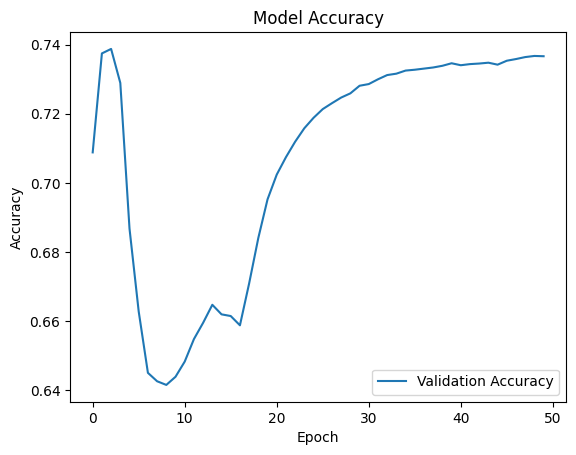

In [76]:
# Train the model for
# Plotting training accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Visualization**

Original image shape: (32, 32)
Preprocessed image shape: (32, 32, 4)
Ground truth mask shape: (32, 32)
Model input shape: (1, 32, 32, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


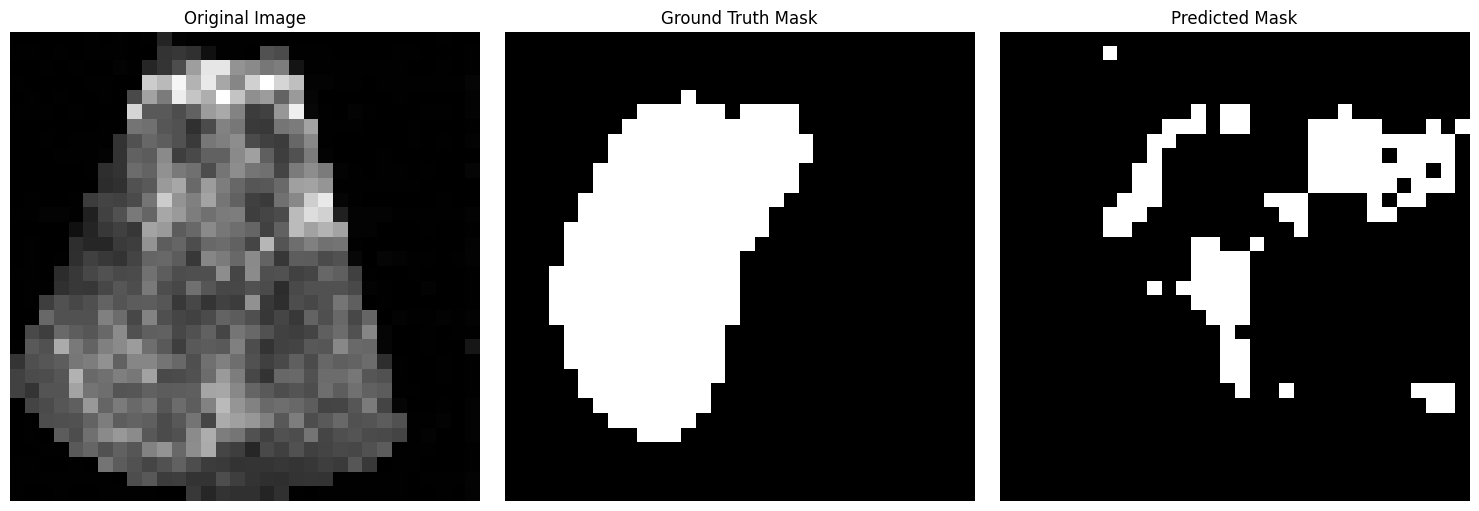

Accuracy: 0.7051
F1 Score: 0.2135


In [86]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

def apply_filters(data):
    """Apply low-pass and high-pass filters"""
    low_pass = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
    high_pass = np.array([1/np.sqrt(2), -1/np.sqrt(2)])

    low = np.convolve(data, low_pass, mode='valid')[::2]
    high = np.convolve(data, high_pass, mode='valid')[::2]

    return low, high

def two_level_2d_wavelet_transform(image):
    """Perform two-level 2D wavelet transform using separable filters"""
    # First level transform
    L1 = np.zeros((image.shape[0], image.shape[1]//2))
    H1 = np.zeros((image.shape[0], image.shape[1]//2))

    for i in range(image.shape[0]):
        L1[i], H1[i] = apply_filters(image[i])

    # Process columns of L1 and H1 (the dimensions are halved after the first transform)
    LL1 = np.zeros((image.shape[0]//2, image.shape[1]//2))
    LH1 = np.zeros((image.shape[0]//2, image.shape[1]//2))
    HL1 = np.zeros((image.shape[0]//2, image.shape[1]//2))
    HH1 = np.zeros((image.shape[0]//2, image.shape[1]//2))

    for j in range(L1.shape[1]//2):  # Iterating based on the reduced size after the first level
        LL1[:,j], LH1[:,j] = apply_filters(L1[:,j])
        HL1[:,j], HH1[:,j] = apply_filters(H1[:,j])

    # Now we can apply second-level wavelet transform on LL1 and LH1
    rows, cols = LL1.shape
    LL2 = np.zeros((rows//2, cols//2))
    LH2 = np.zeros((rows//2, cols//2))
    HL2 = np.zeros((rows//2, cols//2))
    HH2 = np.zeros((rows//2, cols//2))

    for j in range(LL1.shape[1]//2):  # Ensure the loop iterates correctly over the reduced dimensions
        LL2[:,j], LH2[:,j] = apply_filters(LL1[:,j])  # Apply filters
        HL2[:,j], HH2[:,j] = apply_filters(LH1[:,j])  # Apply filters

    return LL2, (LH2, HL2, HH2)

def load_and_preprocess_image(image_path, image_size=(32,32)):
    if not os.path.exists(image_path):
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image could not be loaded: {image_path}")

    img_resized = cv2.resize(img, image_size) / 255.0

    # Use two-level wavelet transform
    LL2, (LH2, HL2, HH2) = two_level_2d_wavelet_transform(img_resized)

    # # Resize coefficients to match image size
    # LL1 = cv2.resize(LL1, image_size)
    # LH1 = cv2.resize(LH1, image_size)
    # HL1 = cv2.resize(HL1, image_size)
    # HH1 = cv2.resize(HH1, image_size)
    LL2 = cv2.resize(LL2, image_size)
    LH2 = cv2.resize(LH2, image_size)
    HL2 = cv2.resize(HL2, image_size)
    HH2 = cv2.resize(HH2, image_size)

    # Stack coefficients for model input
    wavelet_image = np.stack([ LL2, LH2, HL2, HH2], axis=-1)

    return img_resized, wavelet_image

def load_ground_truth_mask(mask_path, image_size=(32, 32)):
    if not os.path.exists(mask_path):
        raise ValueError(f"Ground truth mask not found: {mask_path}")

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Ground truth mask could not be loaded: {mask_path}")

    mask_resized = cv2.resize(mask, image_size)
    mask_binary = (mask_resized > 127).astype(np.uint8)
    return mask_binary

# Fix paths
image_path = "/content/dataset/V2/Imagespng/scene00023.png"
mask_path = "/content/dataset/V2/AnnotationsWB/scene00023.png"  # Fixed path

# Load and preprocess
original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

# Debug prints
print(f"Original image shape: {original_image.shape}")
print(f"Preprocessed image shape: {preprocessed_image.shape}")
print(f"Ground truth mask shape: {ground_truth_mask.shape}")

# Single preprocessing
preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)
print(f"Model input shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)  # Get prediction for batch
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Since we are using batch size of 1, we extract the first prediction
predicted_mask = predicted_mask_binary[0]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(ground_truth_mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(predicted_mask[:, :, 0], cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calculate and print metrics
predicted_flat = predicted_mask.flatten()
ground_truth_flat = ground_truth_mask.flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Metrics

In [87]:
import os
import numpy as np
import cv2
from sklearn.metrics import jaccard_score, f1_score

def apply_filters(data):
    """Apply low-pass and high-pass filters"""
    low_pass = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
    high_pass = np.array([1/np.sqrt(2), -1/np.sqrt(2)])

    low = np.convolve(data, low_pass, mode='valid')[::2]
    high = np.convolve(data, high_pass, mode='valid')[::2]

    return low, high

def single_level_2d_wavelet_transform(image):
    """Perform single-level 2D wavelet transform"""
    L = np.zeros((image.shape[0], image.shape[1]//2))
    H = np.zeros((image.shape[0], image.shape[1]//2))

    for i in range(image.shape[0]):
        L[i], H[i] = apply_filters(image[i])

    LL = np.zeros((image.shape[0]//2, image.shape[1]//2))
    LH = np.zeros((image.shape[0]//2, image.shape[1]//2))
    HL = np.zeros((image.shape[0]//2, image.shape[1]//2))
    HH = np.zeros((image.shape[0]//2, image.shape[1]//2))

    for j in range(L.shape[1]):
        LL[:,j], LH[:,j] = apply_filters(L[:,j])
        HL[:,j], HH[:,j] = apply_filters(H[:,j])

    return LL, (LH, HL, HH)

class TestWaveletDataGenerator:
    def __init__(self, image_folder, mask_folder, image_size=(128,128)):
        self.image_paths = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder)])
        self.mask_paths = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder)])
        self.image_size = image_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        # Load image
        img_path = self.image_paths[index]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.image_size)
        img = img.astype(np.float32) / 255.0

        # Load mask
        mask_path = self.mask_paths[index]
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.image_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        # Apply custom wavelet transform
        LL, (LH, HL, HH) = single_level_2d_wavelet_transform(img)

        # Resize coefficients
        LL = cv2.resize(LL, self.image_size)
        LH = cv2.resize(LH, self.image_size)
        HL = cv2.resize(HL, self.image_size)
        HH = cv2.resize(HH, self.image_size)

        # Stack coefficients
        wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)

        return np.expand_dims(wavelet_image, axis=0), np.expand_dims(mask, axis=0)

# Usage
TEST_IMAGE_PATH = "/content/dataset/test/Images"
TEST_MASK_PATH = "/content/dataset/test/masks"

test_data_gen = TestWaveletDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)

In [88]:
def compute_metrics(model, data_gen, batch_size=8):
    iou_scores = []
    dice_scores = []

    for i in range(len(data_gen)):
        print(f"Processing image {i+1}/{len(data_gen)}")

        image, mask = data_gen[i]
        pred = model.predict(image)
        pred = (pred > 0.5).astype(np.uint8)
        mask = (mask > 0.5).astype(np.uint8)

        iou = jaccard_score(mask.flatten(), pred.flatten())
        dice = f1_score(mask.flatten(), pred.flatten())

        iou_scores.append(iou)
        dice_scores.append(dice)

    return np.mean(iou_scores), np.mean(dice_scores)


test_data_gen = TestWaveletDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)
iou, dice = compute_metrics(model, test_data_gen)

print("Test IoU:", iou)
print("Test Dice Coefficient:", dice)

Processing image 1/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processing image 2/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 3/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing image 4/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 5/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing image 6/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing image 7/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 8/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 9/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 10/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 11/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing image 12/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test IoU: 0.10228802381159909
Test Dice Coefficient: 0.1855060040578648
